In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
df=pd.read_csv('final_format_comparison_ol_InGrWr.csv')
wrf_domain=pd.read_csv('wrf_domain_mean.txt')
goes_domain=pd.read_csv('data_GOES_latest_20april.csv')
wrf_domain.head()

,wrf_ghi
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [36]:
sat_wrf = pd.concat([wrf_domain,goes_domain],axis=1)
sat_wrf.drop(['Unnamed: 0', 'months'], axis=1, inplace=True)
sat_wrf.head()

,wrf_ghi,hours,date,month,ghi_mean
0,0.0,1,2017-07-01,july,0.0
1,0.0,2,2017-07-01,july,0.0
2,0.0,3,2017-07-01,july,0.0
3,0.0,4,2017-07-01,july,0.0
4,0.0,5,2017-07-01,july,0.0


In [62]:
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ghi_mean'], g['wrf_ghi'] )
    RMSE = np.sqrt( mean_squared_error( g['ghi_mean'], g['wrf_ghi'] ) )
    return pd.Series( dict(  MAE_GOES = MAE, RMSE_GOES = RMSE ) )

stat=sat_wrf.groupby( 'month' ).apply( r2_rmse ).reset_index()
goes=stat
goes.loc[10] = ['June',np.nan,np.nan]
goes.loc[11] = ['December',np.nan,np.nan]
goes = goes.set_index(['month'])
new_index=["June","july", "august","september","october","november","December","january","february","march","april","may"]
goes=goes.reindex(new_index)
goes.reset_index(inplace=True)
goes['month'] = goes['month'].str.capitalize() 

goes

,month,MAE_GOES,RMSE_GOES
0,June,NaN,NaN
1,July,100.799564,165.200168
2,August,112.661393,190.515809
3,September,113.698090,183.910909
4,October,107.263292,177.810667
5,November,69.178565,110.920749
6,December,NaN,NaN
7,January,74.737479,117.439904
8,February,82.849145,135.323244
9,March,103.420690,168.873632


In [14]:
# #Creating GOES data interpolated #################
# df=pd.read_csv('final_format_comparison_ol_InGrWr.csv')
# df_new=df.loc[:,['date','time_new','months']]
# df_new.columns=['date','hours','month']
# GOES=pd.read_csv('df_goes_sat_mean.csv',sep=',')
# del GOES['Unnamed: 0']
# GOES['date'] =  pd.to_datetime(GOES['date'], format='%Y%m%d')
# GOES_new=GOES.loc[:,['hours','ghi_mean','date','months']]
# df_new['date'] =  pd.to_datetime(df_new['date'], infer_datetime_format=True)
# a=df_new.set_index(['hours','date'])
# b=GOES_new.set_index(['hours','date'])
# da = a.join(b)
# da.reset_index(inplace=True)
# dat=da.sort_values(by=['date', 'hours'])
# data= dat[(dat.month != 'june') & (dat.month != 'december')]
# data.loc[data.hours == 23, 'ghi_mean'] = 100
# data.fillna(0,inplace=True)
# data.reset_index(drop=True,inplace=True)

C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\spark\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [16]:
#data.to_csv('data_GOES_latest.csv')

In [2]:
# df=df[(13 < df['time_new']) & (df['time_new'] < 24)]
# df.head(24)
# df=pd.read_csv('final_format_comparison_ol_InGrWr.csv')

In [55]:
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_alao'], g['wrf_alao'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_alao'], g['wrf_alao'] ) )
    return pd.Series( dict(  MAE_alao = MAE, RMSE_alao = RMSE ) )

stat=df.groupby( 'months' ).apply( r2_rmse ).reset_index()
alao=stat
alao = alao.set_index(['months'])
new_index=["june", "july", "august","september","october","november","december","january","february","march","april","may"]
alao=alao.reindex(new_index)
alao.reset_index(inplace=True)
alao['months'] = alao['months'].str.capitalize() 
alao

,months,MAE_alao,RMSE_alao
0,June,122.977778,216.369774
1,July,140.842742,254.857391
2,August,139.412634,252.833310
3,September,140.756944,256.473868
4,October,119.647849,221.635485
5,November,110.676389,206.138429
6,December,120.060484,215.921506
7,January,114.537634,214.506759
8,February,120.858631,237.864912
9,March,141.926075,255.714743


In [56]:
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_cumbe'], g['wrf_cumbe'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_cumbe'], g['wrf_cumbe'] ) )
    return pd.Series( dict(  MAE_cumbe = MAE, RMSE_cumbe = RMSE ) )

stat=df.groupby( 'months' ).apply( r2_rmse ).reset_index()
cumbe=stat
cumbe = cumbe.set_index(['months'])
new_index=["june", "july", "august","september","october","november","december","january","february","march","april","may"]
cumbe=cumbe.reindex(new_index)
cumbe.reset_index(inplace=True)
del cumbe['months']
cumbe

,MAE_cumbe,RMSE_cumbe
0,88.270833,165.115801
1,105.444892,196.740557
2,105.560484,204.964028
3,127.138889,236.410683
4,132.247312,237.342714
5,106.995833,206.459131
6,115.185484,213.467385
7,119.315860,223.279473
8,123.086310,235.477042
9,138.833118,254.345570


In [57]:
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_irquis'], g['wrf_irquis'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_irquis'], g['wrf_irquis'] ) )
    return pd.Series( dict(  MAE_irquis = MAE, RMSE_irquis = RMSE ) )

stat=df.groupby( 'months' ).apply( r2_rmse ).reset_index()
irquis=stat
irquis = irquis.set_index(['months'])
new_index=["june", "july", "august","september","october","november","december","january","february","march","april","may"]
irquis=irquis.reindex(new_index)
irquis.reset_index(inplace=True)
del irquis['months']
irquis

,MAE_irquis,RMSE_irquis
0,88.463889,159.233112
1,107.642473,197.707474
2,105.323925,196.269148
3,129.502778,232.808644
4,113.774194,212.333885
5,100.890278,190.143739
6,103.947581,189.333187
7,103.766129,192.997556
8,113.898810,216.340344
9,127.223118,236.443577


In [58]:
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_tunshi'], g['wrf_tunshi'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_tunshi'], g['wrf_tunshi'] ) )
    return pd.Series( dict(  MAE_tunshi = MAE, RMSE_tunshi = RMSE ) )

stat=df.groupby( 'months' ).apply( r2_rmse ).reset_index()
tunshi=stat
tunshi = tunshi.set_index(['months'])
new_index=["june", "july", "august","september","october","november","december","january","february","march","april","may"]
tunshi=tunshi.reindex(new_index)
tunshi.reset_index(inplace=True)
del tunshi['months']
tunshi

,MAE_tunshi,RMSE_tunshi
0,86.495833,157.885804
1,92.315860,175.460134
2,93.916667,178.311325
3,93.556944,182.285462
4,100.319892,190.325333
5,83.909722,168.425424
6,101.048387,190.863886
7,108.206989,203.853096
8,97.008929,196.666740
9,121.942204,222.524920


In [59]:
def r2_rmse( g ):
    MAE = mean_absolute_error( g['ground_tixan'], g['wrf_tixan'] )
    RMSE = np.sqrt( mean_squared_error( g['ground_tixan'], g['wrf_tixan'] ) )
    return pd.Series( dict(  MAE_tixan = MAE, RMSE_tixan = RMSE ) )

stat=df.groupby( 'months' ).apply( r2_rmse ).reset_index()
tixan=stat
tixan = tixan.set_index(['months'])
new_index=["june", "july", "august","september","october","november","december","january","february","march","april","may"]
tixan=tixan.reindex(new_index)
tixan.reset_index(inplace=True)
del tixan['months']
tixan

,MAE_tixan,RMSE_tixan
0,81.311111,155.034004
1,100.161290,180.100394
2,83.919355,161.760572
3,103.104167,188.963068
4,98.485215,188.464090
5,99.393056,184.524906
6,84.206989,158.548640
7,108.711022,204.946175
8,86.250000,168.976988
9,88.520161,170.941121


In [60]:
df_concat=pd.concat([alao,tunshi,cumbe,irquis,tixan],axis=1)

#df_concat.set_index(['months'],inplace=True)

<Figure size 1200x600 with 0 Axes>

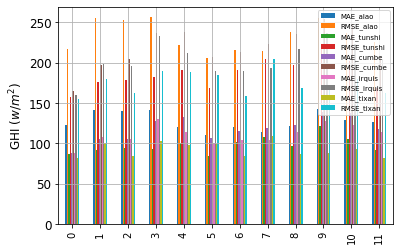

In [61]:
plt.figure(figsize=(12,6),dpi=100)
df_concat.plot.bar(stacked=False)
#df_concat.boxplot()
#plt.xlabel('',fontsize=12)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=12)
#plt.ylim(0,600)
plt.legend(fontsize=7,loc='upper right')
plt.grid()
plt.show()

In [ ]:
# GOES=pd.read_csv('GOES_wrf_stat.csv',delim_whitespace=True)
# GOES

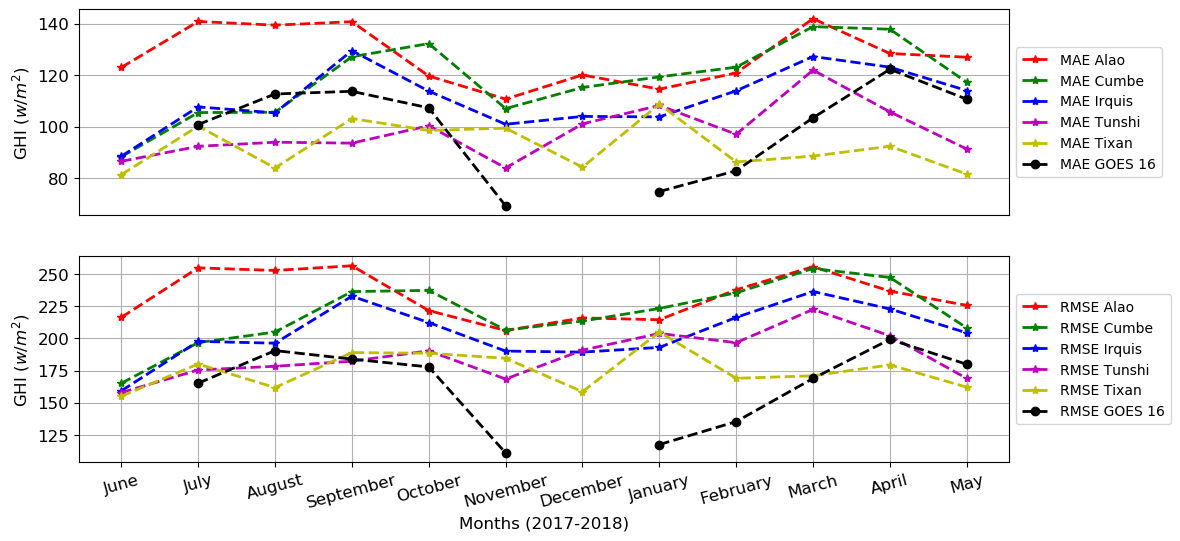

In [64]:
plt.figure(figsize=(12,6),dpi=100)
plt.subplot(211)
plt.plot(df_concat.months,df_concat.MAE_alao,'r*--',label='MAE Alao',linewidth=2)
plt.plot(df_concat.months,df_concat.MAE_cumbe,'g*--',label='MAE Cumbe',linewidth=2)
plt.plot(df_concat.months,df_concat.MAE_irquis,'b*--',label='MAE Irquis',linewidth=2)
plt.plot(df_concat.months,df_concat.MAE_tunshi,'m*--',label='MAE Tunshi',linewidth=2)
plt.plot(df_concat.months,df_concat.MAE_tixan,'y*--',label='MAE Tixan',linewidth=2)
plt.plot(goes.month,goes.MAE_GOES,'ko--',label='MAE GOES 16',linewidth=2)
#plt.xlabel('Month of April (Days)',fontsize=15)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks([])
plt.yticks(fontsize=12)
#plt.legend(fontsize=8,loc='best')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(50,600)
plt.grid()
plt.subplot(212)
plt.plot(df_concat.months,df_concat.RMSE_alao,'r*--',label='RMSE Alao',linewidth=2)
plt.plot(df_concat.months,df_concat.RMSE_cumbe,'g*--',label='RMSE Cumbe',linewidth=2)
plt.plot(df_concat.months,df_concat.RMSE_irquis,'b*--',label='RMSE Irquis',linewidth=2)
plt.plot(df_concat.months,df_concat.RMSE_tunshi,'m*--',label='RMSE Tunshi',linewidth=2)
plt.plot(df_concat.months,df_concat.RMSE_tixan,'y*--',label='RMSE Tixan',linewidth=2)
plt.plot(goes.month,goes.RMSE_GOES,'ko--',label='RMSE GOES 16',linewidth=2)
plt.xlabel('Months (2017-2018)',fontsize=12)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks(fontsize=12,rotation=15)
plt.yticks(fontsize=12)
#plt.legend(fontsize=8,loc='best')
#plt.ylim(50,600)
plt.grid()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=1)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



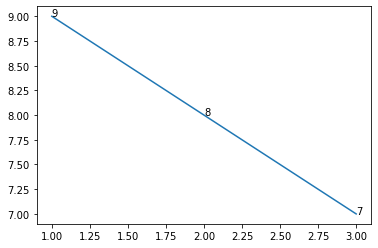

In [2]:
from matplotlib import pyplot
x=[1,2,3]
y=[9,8,7]

pyplot.plot(x,y)
for a,b in zip(x, y): 
    pyplot.text(a, b, str(b))
pyplot.show()